## 讀取圖片
常見的套件:
1. skimage
2. PIL
3. OpenCV

# [教學目標]
- 示範其他的讀圖檔方式

# [範例重點]
- 用 skimage.io 讀取圖檔 (In[2], Out[2])
- 用 PIL.Image 讀取圖檔 (In[3], Out[3])
- 用 OpenCV 讀取圖檔 (In[4], Out[4])

In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


In [3]:
%conda install scikit-image
%conda install Pillow
%conda install OpenCV

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 22.9.0
  latest version: 23.10.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /Users/op_vrijheid/opt/anaconda3/envs/Machine_Learning

  added / updated specs:
    - scikit-image


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    scipy-1.11.3               |  py310hdb2ea58_0        20.7 MB
    ------------------------------------------------------------
                                           Total:        20.7 MB

The following NEW packages will be INSTALLED:

  aom                pkgs/main/osx-64::aom-3.6.0-hcec6c5f_0 None
  blosc              pkgs/main/osx-64::blosc-1.21.3-hcec6c5f_0 None
  brunsli            pkgs/main/osx-64::brunsli-0.1-h23ab428_0 None
  c-ares             pkgs/main/osx-64::c-ares-1.19.1-h6c

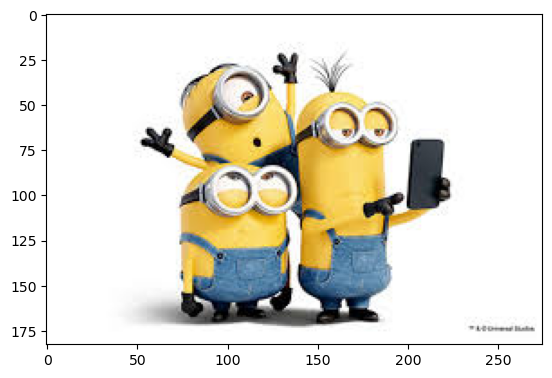

In [7]:
import skimage.io as skio
img1 = skio.imread('example.jpg')
plt.imshow(img1)
plt.show()

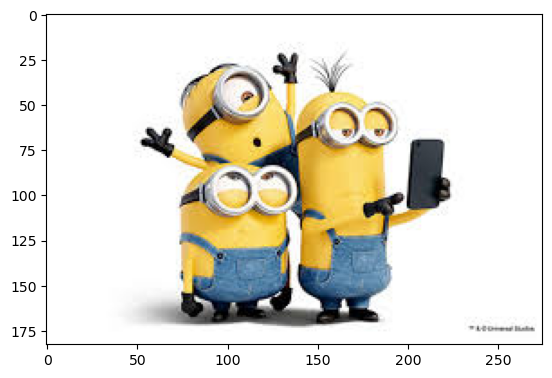

In [9]:
from PIL import Image
img2 = Image.open('example.jpg') #這時候還是 PIL object
img2 = np.array(img2)
plt.imshow(img2)
plt.show()

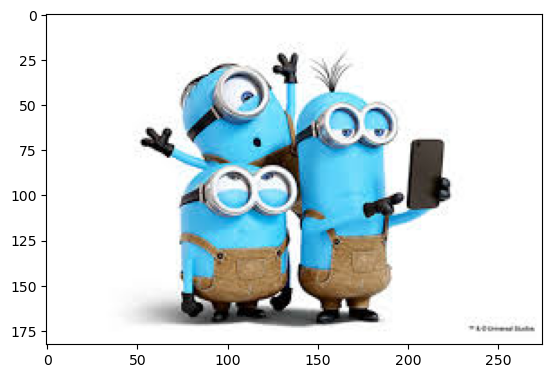

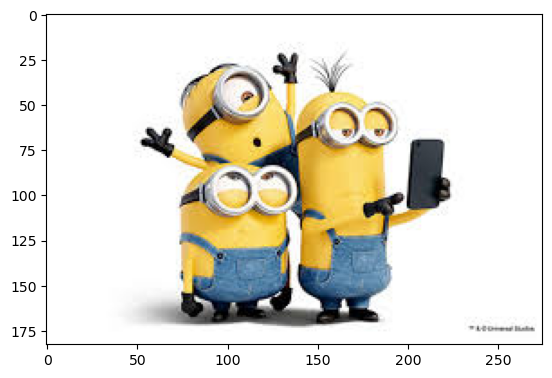

In [11]:
import cv2
img3 = cv2.imread('example.jpg')
plt.imshow(img3)
plt.show()

img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
plt.imshow(img3)
plt.show()

### 比較三種開圖方式的時間 - 比較讀取 1000 次

In [12]:
N_times = 1000

In [14]:
%%timeit
im = np.array([skio.imread('example.jpg') for _ in range(N_times)])

892 ms ± 18.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [15]:
%%timeit
im = np.array([np.array(Image.open('example.jpg')) for _ in range(N_times)])

715 ms ± 15 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [16]:
%%timeit
im = np.array([cv2.cvtColor(cv2.imread('example.jpg'), cv2.COLOR_BGR2RGB) for _ in range(N_times)])

643 ms ± 24.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## 將影像存成 mat

In [17]:
import scipy.io as sio
sio.savemat(file_name='example.mat', mdict={'img': img1})

In [18]:
mat_arr = sio.loadmat('example.mat')
print(mat_arr.keys())

dict_keys(['__header__', '__version__', '__globals__', 'img'])


In [19]:
mat_arr = mat_arr['img']
print(mat_arr.shape)

(183, 275, 3)


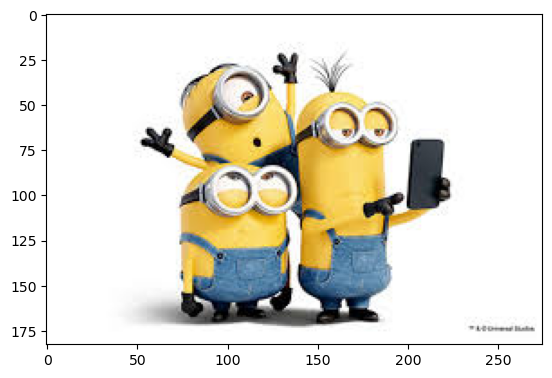

In [20]:
plt.imshow(mat_arr)
plt.show()

# 練習時間

## 1-1 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

## 1-2 將所提供的 txt 轉成 pandas dataframe

## 2. 從所提供的 txt 中的連結讀取圖片，請讀取上面 data frame 中的前 5 張圖片